In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv(Path('../Resources/Cleaned/Sample_data.csv'))
df.head()

,Month,Year,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,7,2021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,162000.0,61,265.0,1008.0,154500.0,2.0
1,8,2021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,165000.0,14,164.0,1004.0,165000.0,1.0
2,9,2021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,201950.0,19,236.0,886.0,192105.0,4.0
3,1,2022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,252400.0,44,249.0,1012.0,251200.0,1.0
4,3,2022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,247350.0,21,271.0,949.0,243625.0,1.0


In [3]:
df["period"] = df["Month"].astype(str) + df["Year"].astype(str)

In [4]:
df['median_days_on_market'].max()

3140

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86116 entries, 0 to 86115
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 86116 non-null  int64  
 1   Year                                  86116 non-null  int64  
 2   zip                                   86116 non-null  int64  
 3   lat                                   86116 non-null  float64
 4   lng                                   86116 non-null  float64
 5   state                                 86116 non-null  object 
 6   city                                  86116 non-null  object 
 7   population                            86116 non-null  float64
 8   density                               86116 non-null  float64
 9   median_listing_price                  86116 non-null  float64
 10  median_days_on_market                 86116 non-null  int64  
 11  median_listing_

In [6]:
df.shape

(86116, 16)

In [7]:
df.describe()

,Month,Year,zip,lat,lng,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
count,86116.000000,86116.000000,86116.000000,86116.000000,86116.000000,86116.000000,86116.00000,8.611600e+04,86116.000000,86116.000000,86116.000000,8.611600e+04,86116.000000
mean,6.424114,2020.311835,20564.290585,36.823215,-77.623985,17164.289191,1905.97369,4.508732e+05,83.240942,253.920456,1918.218484,5.914165e+05,103.792710
std,3.432979,0.953692,10093.286939,7.038274,3.650338,18646.022068,5657.38072,7.891382e+05,76.707192,1778.428508,869.929857,1.090454e+06,157.700844
min,1.000000,2019.000000,10001.000000,24.585500,-87.467920,0.000000,0.00000,3.500000e+03,0.000000,3.000000,320.000000,5.900000e+03,0.000000
25%,4.000000,2020.000000,12418.000000,28.584930,-81.343010,2508.000000,29.50000,2.119500e+05,45.000000,126.000000,1488.000000,2.388908e+05,13.000000
50%,6.000000,2020.000000,14026.000000,40.846710,-76.741370,10648.000000,193.20000,3.174500e+05,66.000000,175.000000,1795.000000,3.740000e+05,47.000000
75%,9.000000,2021.000000,32958.000000,42.652930,-73.979430,26305.000000,1205.70000,4.999000e+05,98.000000,266.000000,2159.000000,6.165700e+05,134.000000
max,12.000000,2022.000000,34997.000000,44.989260,-71.951800,108661.000000,61244.70000,1.000000e+08,3140.000000,462500.000000,60984.000000,1.430000e+08,2878.000000


In [8]:
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Month'], axis=1, inplace=True)

In [9]:
df.columns

Index(['zip', 'lat', 'lng', 'state', 'city', 'population', 'density',
       'median_listing_price', 'median_days_on_market',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count', 'period'],
      dtype='object')

In [10]:
# Rearrange the columns
df=df[['period','zip', 'lat', 'lng', 'state', 'city', 'population', 'density',
       'median_listing_price', 'median_days_on_market',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count']]

In [11]:
df.head()

,period,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,72021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,162000.0,61,265.0,1008.0,154500.0,2.0
1,82021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,165000.0,14,164.0,1004.0,165000.0,1.0
2,92021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,201950.0,19,236.0,886.0,192105.0,4.0
3,12022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,252400.0,44,249.0,1012.0,251200.0,1.0
4,32022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,247350.0,21,271.0,949.0,243625.0,1.0


In [12]:
# Splitting target variable
target = df['median_listing_price']
target.head()

0    162000.0
1    165000.0
2    201950.0
3    252400.0
4    247350.0
Name: median_listing_price, dtype: float64

/Users/rohansalwi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

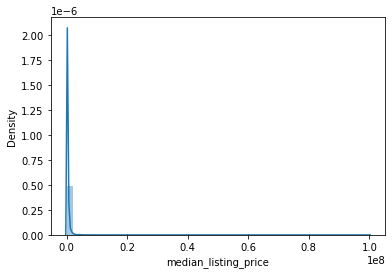

In [13]:
# visualizing the distribution of the target variable
import seaborn as sns
sns.distplot(target, hist=True)

In [14]:
# As the data is left skewed we have to use log transformation to have a normally distributed data
target_log = np.log(target)

/Users/rohansalwi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

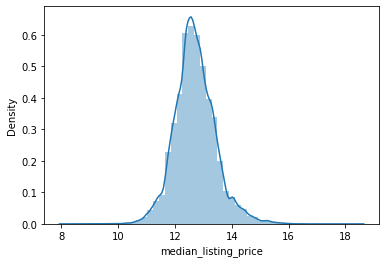

In [15]:
# check if the data is now ND
sns.distplot(target_log, hist=True)

array([[<AxesSubplot:title={'center':'Sale Price'}>,
        <AxesSubplot:title={'center':'Log Sale Price'}>]], dtype=object)

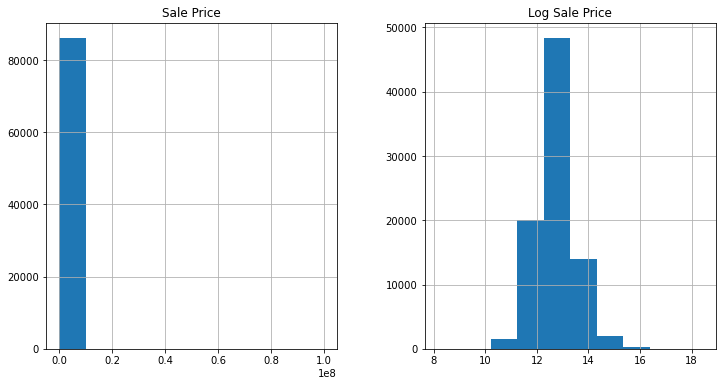

In [16]:
# View the data before transformation and data after transformation
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":df["median_listing_price"], "Log Sale Price":target_log})
prices.hist()

In [17]:
# drop target variable from dataset
raw_data = df
df = df.drop(["median_listing_price"], axis = 1)
df.head()

,period,zip,lat,lng,state,city,population,density,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,72021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,61,265.0,1008.0,154500.0,2.0
1,82021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,14,164.0,1004.0,165000.0,1.0
2,92021,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,19,236.0,886.0,192105.0,4.0
3,12022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,44,249.0,1012.0,251200.0,1.0
4,32022,10975,41.25951,-74.17042,NY,Southfields,91.0,7.0,21,271.0,949.0,243625.0,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86116 entries, 0 to 86115
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   period                                86116 non-null  object 
 1   zip                                   86116 non-null  int64  
 2   lat                                   86116 non-null  float64
 3   lng                                   86116 non-null  float64
 4   state                                 86116 non-null  object 
 5   city                                  86116 non-null  object 
 6   population                            86116 non-null  float64
 7   density                               86116 non-null  float64
 8   median_days_on_market                 86116 non-null  int64  
 9   median_listing_price_per_square_foot  86116 non-null  float64
 10  median_square_feet                    86116 non-null  float64
 11  average_listing

In [19]:
# Feature engineering
df['period'] = df['period'].apply(str)
df['zip'] = df['zip'].astype(str)
df['lat'] = df['lat'].astype(str)
df['lng'] = df['lng'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86116 entries, 0 to 86115
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   period                                86116 non-null  object 
 1   zip                                   86116 non-null  object 
 2   lat                                   86116 non-null  object 
 3   lng                                   86116 non-null  object 
 4   state                                 86116 non-null  object 
 5   city                                  86116 non-null  object 
 6   population                            86116 non-null  float64
 7   density                               86116 non-null  float64
 8   median_days_on_market                 86116 non-null  int64  
 9   median_listing_price_per_square_foot  86116 non-null  float64
 10  median_square_feet                    86116 non-null  float64
 11  average_listing

In [21]:
# Separate the numerical columns from the string ones
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# df with categorical features
df_cat = df[categorical_columns]

# df with numerical features
df_num = df.drop(categorical_columns, axis=1)

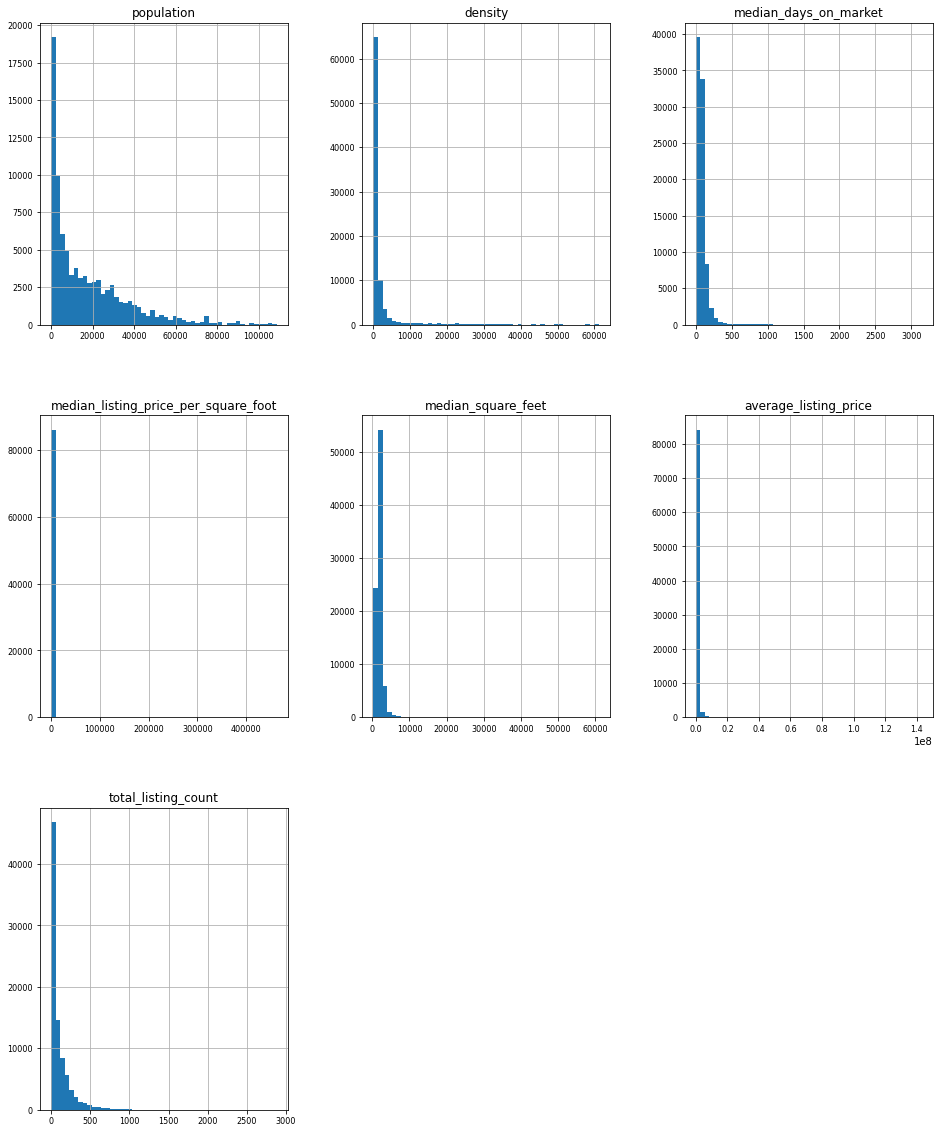

In [22]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [23]:
# As all the columns are positively skewed, we will perform normalization on these columns
from scipy.stats import skew
df_skew = df_num.apply(lambda x: skew(x.dropna()))
df_skew = df_skew[df_skew > .75]

# Apply log +1 transformations for all numeric features with skewness over .75
df_num[df_skew.index] = np.log1p(df_num[df_skew.index])

In [24]:
df_skew

population                                1.566630
density                                   5.261059
median_days_on_market                     7.965532
median_listing_price_per_square_foot    229.449942
median_square_feet                       14.036033
average_listing_price                    52.562970
total_listing_count                       4.514834
dtype: float64

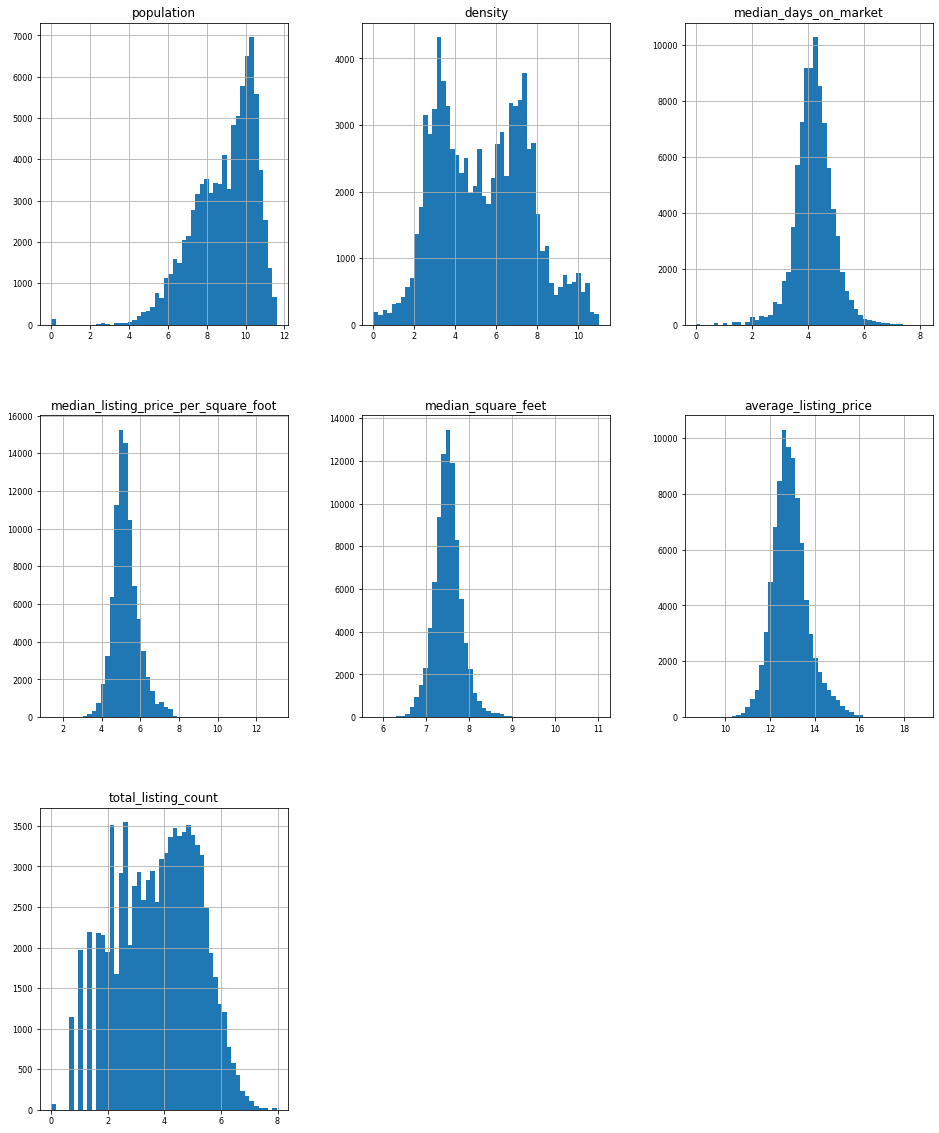

In [25]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [26]:
# Mean Normalization
# Normalizing data to scale a variable to have values between 0 and 1
df_num = ((df_num - df_num.mean())/(df_num.max() - df_num.min()))
df_num.describe()

,population,density,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
count,8.611600e+04,8.611600e+04,8.611600e+04,8.611600e+04,8.611600e+04,8.611600e+04,8.611600e+04
mean,-5.499193e-14,-9.796651e-15,9.480164e-14,2.484881e-14,-2.190366e-14,-1.643162e-14,-8.223677e-14
std,1.362009e-01,2.021557e-01,8.302192e-02,5.725127e-02,6.284446e-02,7.932076e-02,1.796538e-01
min,-7.693933e-01,-4.849077e-01,-5.224420e-01,-3.313028e-01,-3.294155e-01,-4.176797e-01,-4.734650e-01
25%,-9.436388e-02,-1.748437e-01,-4.697000e-02,-3.469447e-02,-3.697489e-02,-5.109099e-02,-1.421416e-01
50%,3.029824e-02,-6.902055e-03,-2.688806e-04,-6.705631e-03,-1.247948e-03,-6.690126e-03,1.254935e-02
75%,1.082847e-01,1.588254e-01,4.821756e-02,2.904328e-02,3.392421e-02,4.282858e-02,1.423733e-01
max,2.306067e-01,5.150923e-01,4.775580e-01,6.686972e-01,6.705845e-01,5.823203e-01,5.265350e-01


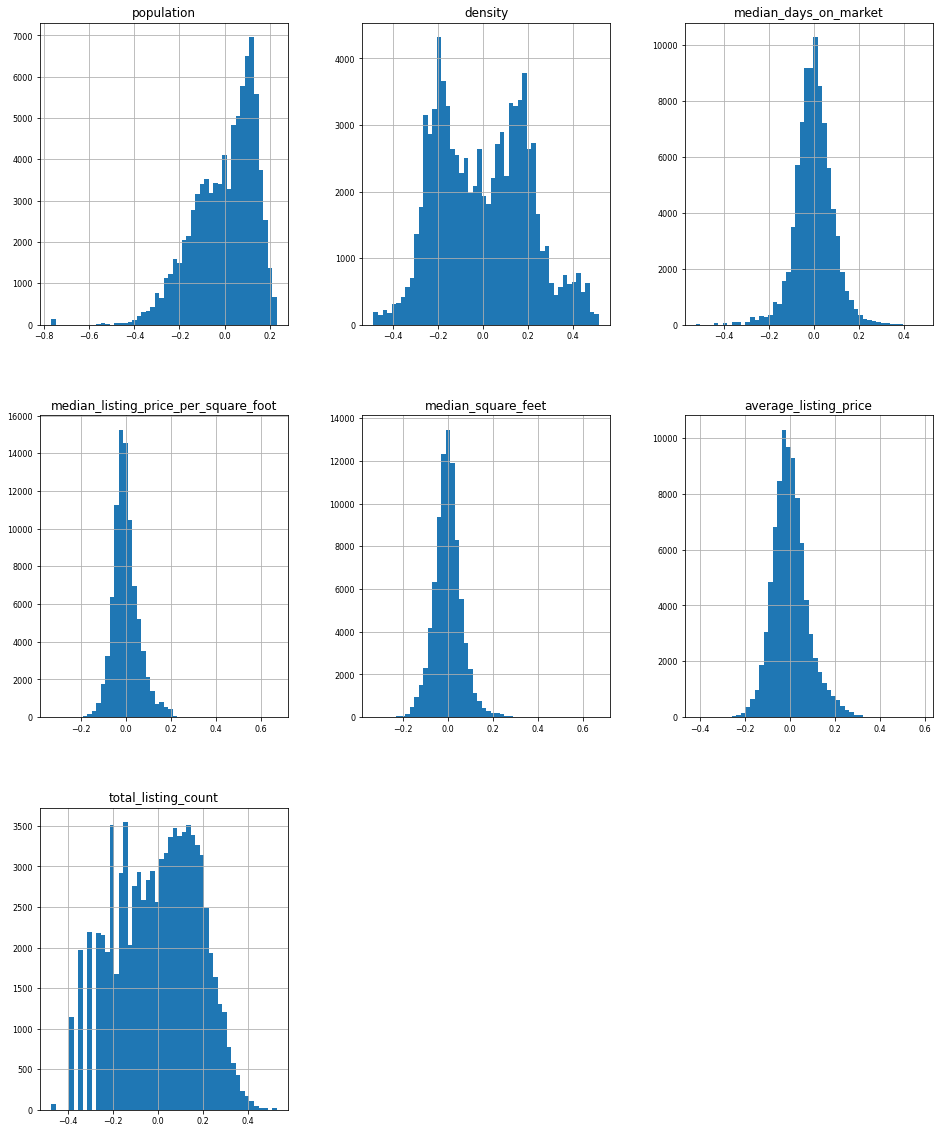

In [27]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

/Users/rohansalwi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='median_listing_price'>

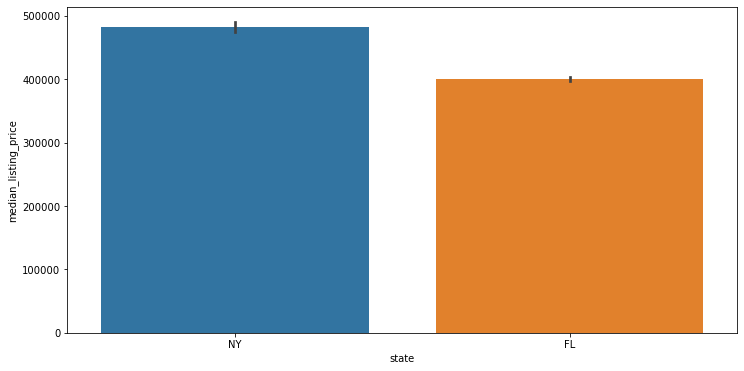

In [28]:
# EDA, effect of various factors on the sales price
sns.barplot(raw_data.state, raw_data.median_listing_price)

Text(0.5, 0, 'Price per square feet')

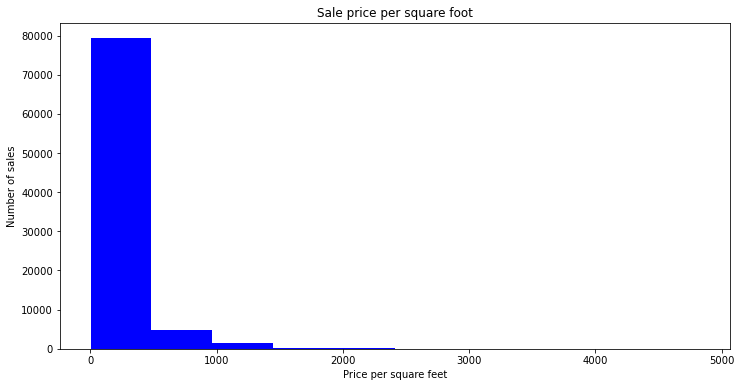

In [29]:
# salesprice per square foot

salespricesf = raw_data['median_listing_price']/raw_data['median_square_feet']
plt.hist(salespricesf, color="blue")
plt.title("Sale price per square foot")
plt.ylabel('Number of sales')
plt.xlabel('Price per square feet')

# from the graph we can say that most of sale happened when the price per square feet was less than $500/sq ft.

Text(0.5, 0, 'Time on Market')

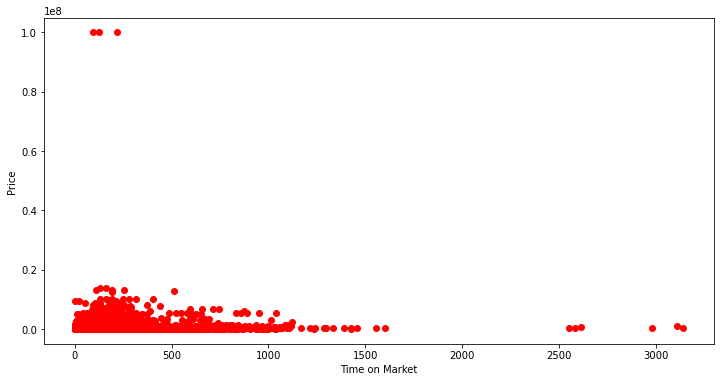

In [30]:
# scatterplot to have a linear relationship between median days on market and salesprice
time = raw_data['median_days_on_market']
price = raw_data['median_listing_price']
plt.scatter(time, price, color="red")
plt.ylabel('Price')
plt.xlabel('Time on Market')

# It shows that a house is sold 

/Users/rohansalwi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Sale price vs Cities')

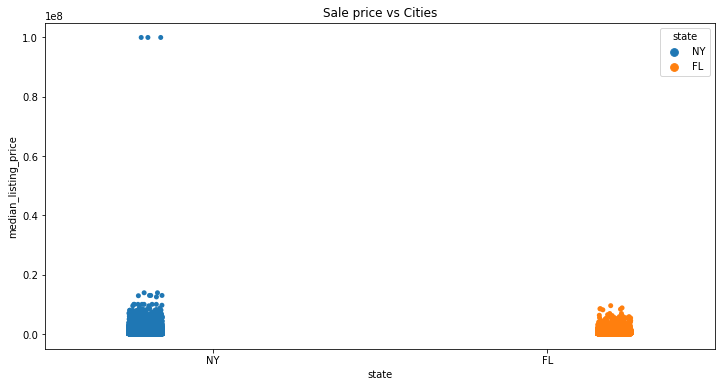

In [31]:
# Stripplot
sns.stripplot(x='state', y='median_listing_price', data=raw_data, hue='state', jitter=True, split=True)
plt.title('Sale price vs Cities')

/Users/rohansalwi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale price vs State')

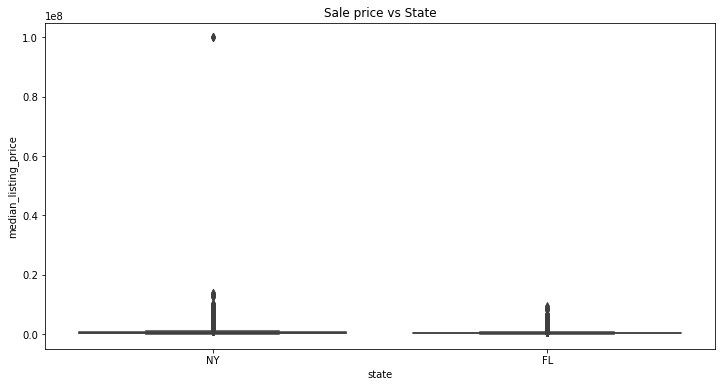

In [34]:
# Newyork housing prices
sns.boxplot(raw_data['state'], raw_data['median_listing_price'])
plt.title("Sale price vs State")

Text(0.5, 1.0, 'Correlation between features')

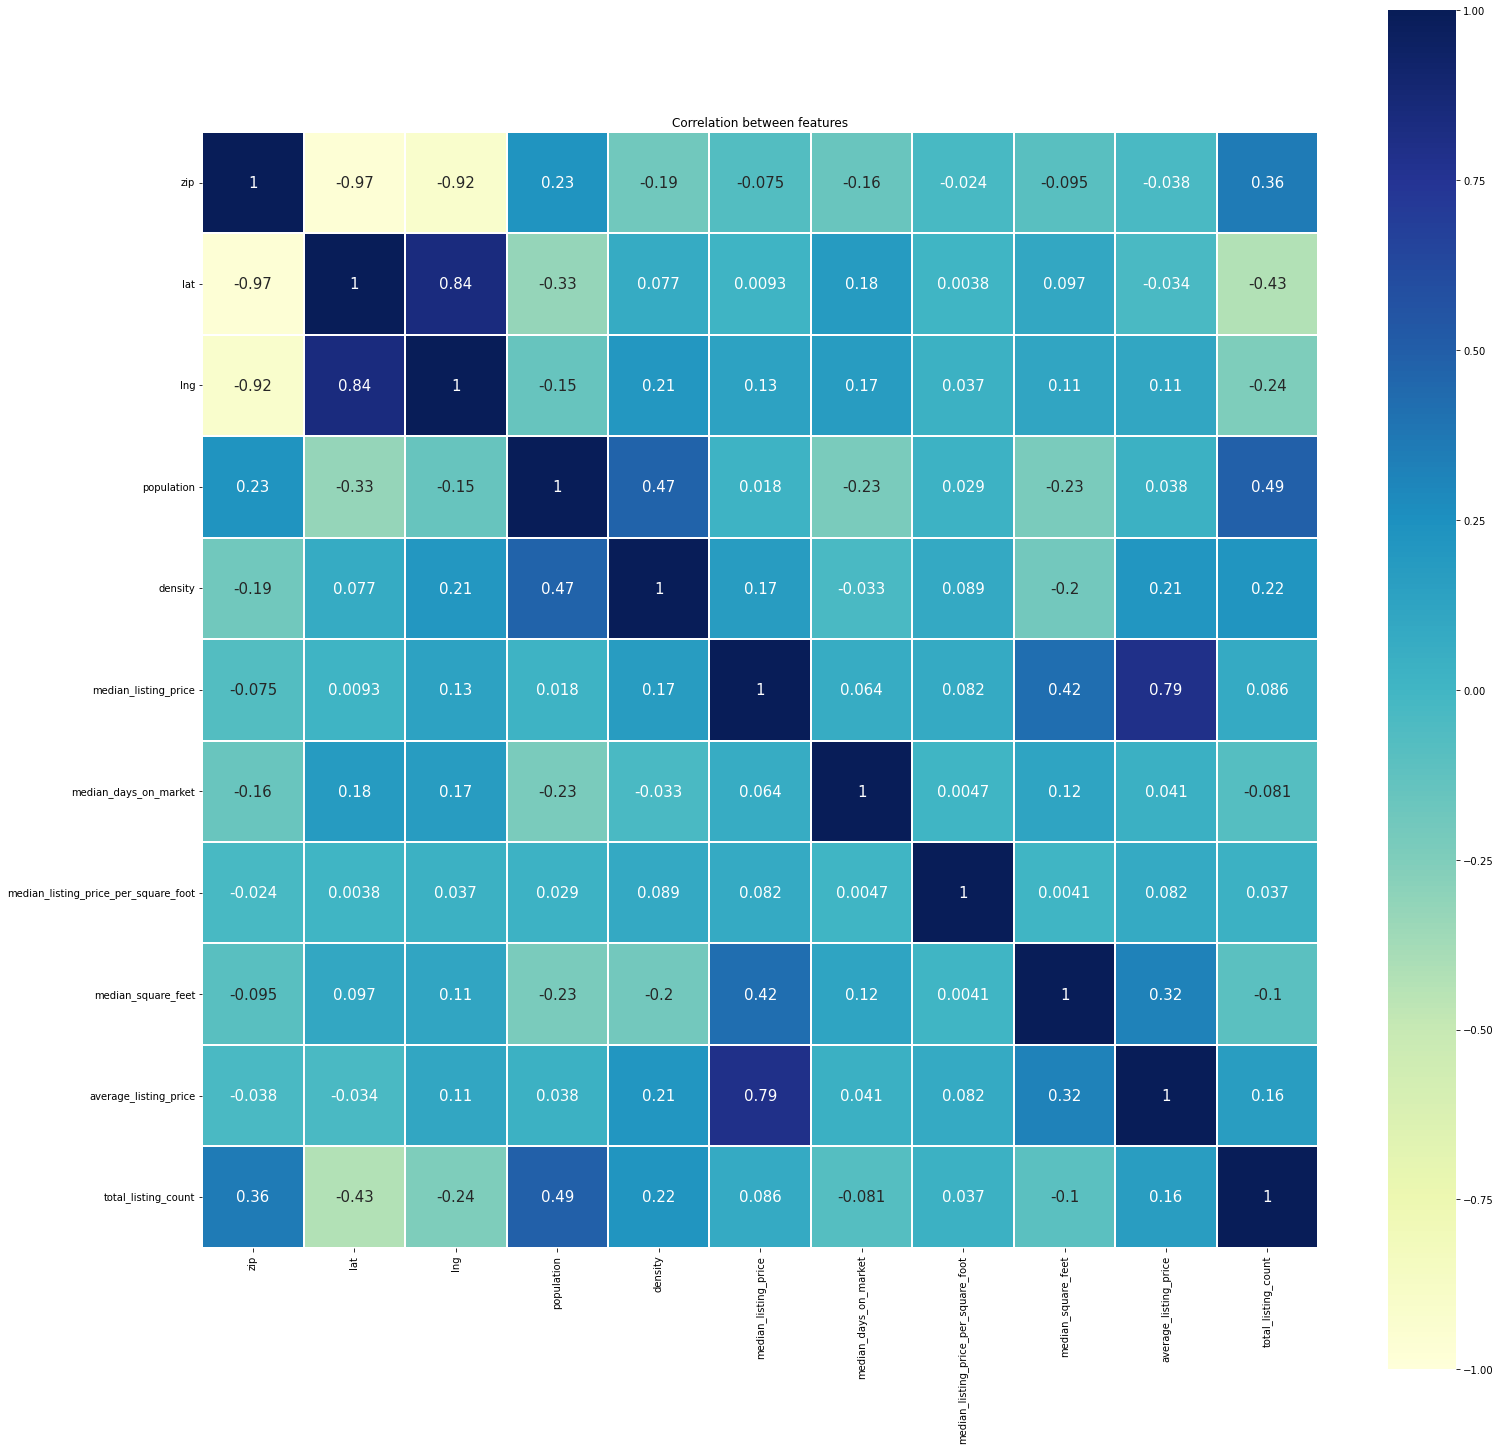

In [44]:
# Plotting correlation plot
import matplotlib.pyplot as plt
corr = raw_data.corr()
plt.figure(figsize=(25,25))
# (corr >= 0.7)|(corr<=-0.7)]
sns.heatmap(corr, cmap='YlGnBu', vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {"size": 15}, square = True);
plt.title('Correlation between features')

# 0-0.2 - weak corr
# 0.3 - 0.6 - Moderate corr
# 0.7 - 1.0 - Strong corr

In [60]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_num, target_log, test_size = 0.3, random_state = 0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (60281, 7)
x_test  (25835, 7)
y_train  (60281,)
y_test  (25835,)


In [61]:
# Build Linear regression model using statsmodel
import statsmodels.api as sm

# Building Linear regression model using OLS - Ordinary Least squares
model1 = sm.OLS(y_train, x_train).fit()

In [62]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     median_listing_price   R-squared (uncentered):                   0.003
Model:                              OLS   Adj. R-squared (uncentered):              0.003
Method:                   Least Squares   F-statistic:                              27.27
Date:                  Mon, 06 Jun 2022   Prob (F-statistic):                    1.11e-37
Time:                          09:59:37   Log-Likelihood:                     -2.3879e+05
No. Observations:                 60281   AIC:                                  4.776e+05
Df Residuals:                     60274   BIC:                                  4.777e+05
Df Model:                             7                                                  
Covariance Type:              nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
population                               0.1794      0.780      0.230      0.818      -1.349       1.708
density                                 -0.0158      0.456     -0.035      0.972      -0.909       0.878
median_days_on_market                   -0.0383      0.666     -0.058      0.954      -1.344       1.267
median_listing_price_per_square_foot     8.9960      2.525      3.563      0.000       4.048      13.944
median_square_feet                       3.2246      1.227      2.628      0.009       0.819       5.630
average_listing_price                    2.2479      1.936      1.161      0.246      -1.547       6.043
total_listing_count                     -0.1862      0.506     -0.368      0.713      -1.178       0.805
==============================================================================
Omnibus:                    22867.029   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1392312.993
Skew:                          -1.013   Prob(JB):                         0.00
Kurtosis:                      26.457   Cond. No.                         17.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
def rmse(predictions, targets):
    differences = predictions - targets   # the differences
    differences_squared = differences**2  # the square
    mean_of_differences_squared = differences_squared.mean()  # the mean of ^
    rmse_val = np.sqrt(mean_of_differences_squared)  # Root of ^
    return rmse_val

In [64]:
cols = ['Model', 'R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [67]:
tmp1 = pd.Series({'Model': "Base Linear Regression Model",
                 'R-Squared Value': model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                'RMSE': rmse(predictions1, y_test)})
model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,RMSE,Adj.R-Squared Value
0,Base Linear Regression Model,0.003158,12.710466,0.003042


In [92]:
# Building model with constant
# result = model.fit(x,y)
df_constant = sm.add_constant(df_num)

In [93]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.3, random_state = 0)

In [94]:
# Building Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS
model2 = sm.OLS(y_train1, x_train1).fit()


In [103]:
# Print Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                   OLS                       Adj. R-squared:          0.956      
Dependent Variable:      median_listing_price      AIC:                     -55594.0949
Date:                    2022-06-06 11:48          BIC:                     -55522.0407
No. Observations:        60281                     Log-Likelihood:          27805.     
Df Model:                7                         F-statistic:             1.877e+05  
Df Residuals:            60273                     Prob (F-statistic):      0.00       
R-squared:               0.956                     Scale:                   0.023278   
---------------------------------------------------------------------------------------
                                      Coef.  Std.Err.     t      P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
const                                12.7089   0.0006 20451.5715 0.0000 12.7077 12.7101
population                            0.1184   0.0094    12.6517 0.0000  0.1001  0.1368
density                              -0.0240   0.0055    -4.3869 0.0000 -0.0347 -0.0133
median_days_on_market                -0.0540   0.0080    -6.7516 0.0000 -0.0696 -0.0383
median_listing_price_per_square_foot  8.6373   0.0303   285.0205 0.0000  8.5779  8.6967
median_square_feet                    3.7341   0.0147   253.4969 0.0000  3.7053  3.7630
average_listing_price                 2.2677   0.0232    97.5630 0.0000  2.2222  2.3133
total_listing_count                  -0.1114   0.0061   -18.3471 0.0000 -0.1233 -0.0995
---------------------------------------------------------------------------------------
Omnibus:                  24293.529            Durbin-Watson:               2.003      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1453726.459
Skew:                     -1.134               Prob(JB):                    0.000      
Kurtosis:                 26.951               Condition No.:               62         
=======================================================================================

"""

In [104]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)
tmp2 = pd.Series({'Model': "Linear Regression Model with Constant",
                 'R-Squared Value': model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                'RMSE': rmse(predictions2, y_test1)})
model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,RMSE,Adj.R-Squared Value
0,Linear Regression Model with Constant,0.956134,0.159117,0.956129


In [105]:
# Check Multicolinearity in the dataset
# Calculating variance inflation factor
print("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0, len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar], (x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar, round(vif,3))


Variance Inflation Factor
const 1.0
population 4.219
density 3.178
median_days_on_market 1.141
median_listing_price_per_square_foot 7.872
median_square_feet 2.224
average_listing_price 8.879
total_listing_count 3.064
